#Proyecto de Modulo 4 "ComercioYa"

##Lección 1: ANÁLISIS EXPLORATORIO DE DATOS


In [2]:
import pandas as pd

df = pd.read_csv("ComercioYA_dataset_EDA_v2.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cliente_id         2000 non-null   int64  
 1   edad               2000 non-null   int64  
 2   genero             2000 non-null   object 
 3   region             1960 non-null   object 
 4   visitas_mensuales  2000 non-null   int64  
 5   numero_compras     2000 non-null   int64  
 6   devoluciones       2000 non-null   int64  
 7   metodo_pago        1960 non-null   object 
 8   reseña_score       1960 non-null   float64
 9   tipo_cliente       2000 non-null   object 
 10  monto_compra       2000 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 172.0+ KB


***Aquí podemos identificar: ***
Cantidad de registros (2000)
Cantidad de columnas
Tipos de datos (int64, float64, object)
Valores no nulos

In [ ]:
df.select_dtypes(include=["int64","float64"]).columns
df.select_dtypes(include=["object"]).columns

El dataset contiene 2000 registros de clientes con variables tanto cuantitativas como categóricas. Las variables numéricas permiten medir comportamiento de compra y actividad, mientras que las categóricas segmentan a los clientes según características demográficas y comerciales.

In [ ]:
df.isnull().sum()
#Aqui podemos detectar valores faltantes, tales como en region, metodo de pago y reseña score

In [ ]:
df[df["edad"] < 18]
#se logran visualizar inconsistencias tales como menores de edad realizando compras online

Se detectan valores faltantes en variables clave que podrían afectar análisis posteriores.

Existen clientes menores de edad, lo que sugiere posibles errores de registro.

Se observan valores máximos elevados en monto_compra que podrían representar clientes premium o outliers.

El dataset presenta diversidad regional y de métodos de pago, lo que permitirá segmentaciones posteriores

##Lección 2: — CONCEPTOS BÁSICOS DE ESTADÍSTICA *DESCRIPTIVA*


In [15]:
#Aplicar medidas de tendencia central, dispersión y posición para comprender el comportamiento de las variables numéricas.
df.describe()

,cliente_id,edad,visitas_mensuales,numero_compras,devoluciones,reseña_score,monto_compra
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1960.000000,2000.000000
mean,1000.500000,47.637500,10.008500,6.051000,0.724000,3.002755,502.790795
std,577.494589,18.321734,3.110991,2.477997,0.750404,1.155661,238.055139
min,1.000000,16.000000,2.000000,0.000000,0.000000,1.000000,58.540000
25%,500.750000,32.000000,8.000000,4.000000,0.000000,2.000000,345.865000
50%,1000.500000,48.000000,10.000000,6.000000,1.000000,3.000000,458.710000
75%,1500.250000,63.000000,12.000000,7.000000,1.000000,4.000000,617.470000
max,2000.000000,79.000000,22.000000,17.000000,3.000000,5.000000,3128.400000


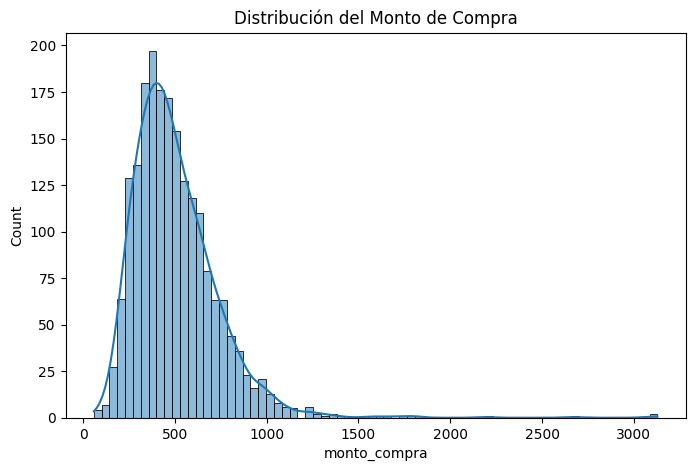

In [ ]:
#Histograma (distribibución)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["monto_compra"], kde=True)
plt.title("Distribución del Monto de Compra")
plt.show()

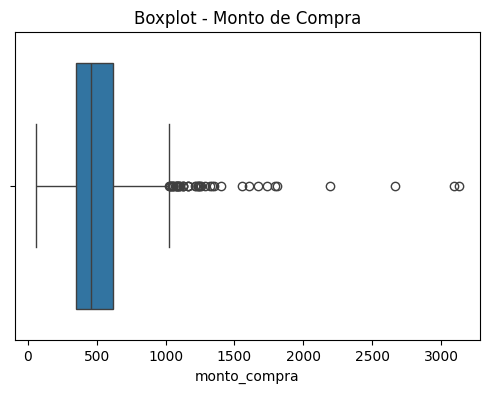

In [ ]:
#Boxplot (distribución de outliers)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["monto_compra"])
plt.title("Boxplot - Monto de Compra")
plt.show()

In [ ]:
#La variable monto_compra presenta una media superior a la mediana, lo que sugiere una distribución asimétrica positiva. Además, el boxplot evidencia la presencia de valores atípicos elevados, que podrían corresponder a clientes premium o compras extraordinarias.
#La variable edad muestra una distribución relativamente amplia, incluyendo registros menores de edad, lo que representa una posible inconsistencia en los datos. No obstante, no se observan outliers extremos significativos en esta variable.
#En general, las variables relacionadas con comportamiento de compra presentan alta dispersión, lo que indica heterogeneidad en el perfil de los clientes. Estos resultados justifican avanzar hacia un análisis de correlación para evaluar posibles relaciones entre variables.


##LECCIÓN 3 — CORRELACIÓN


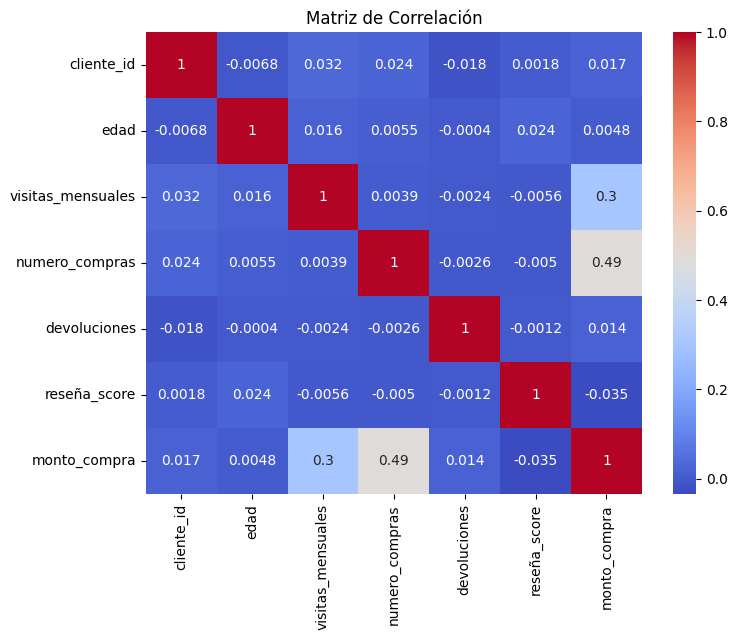

In [ ]:
#Detectar y cuantificar relaciones entre variables numéricas para identificar qué factores influyen en el comportamiento de compra.
corr = df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
#Coeficiente de Pearson (Interpretación)
Regla rápida:
0.70 a 1.00 → fuerte positiva
0.30 a 0.69 → moderada
0.00 a 0.29 → débil

Negativo → relación inversa
#Se lográ apreciar tendencia especial en monto_compra y numero_compras, lo tanto se realizará un scatterplot de ambas relaciones.
#Ademas de uno de visita vs conto de compra.

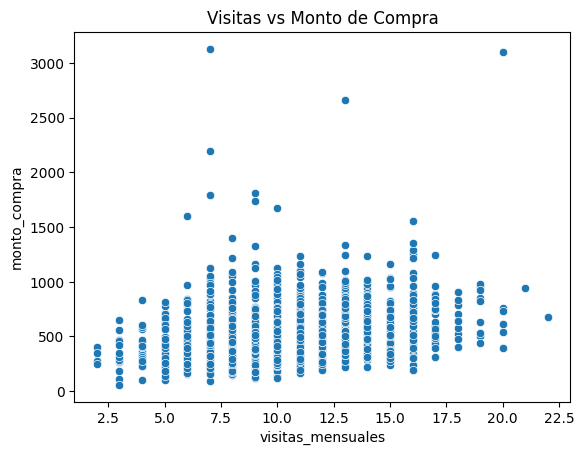

In [ ]:
sns.scatterplot(x="visitas_mensuales", y="monto_compra", data=df)
plt.title("Visitas vs Monto de Compra")
plt.show()

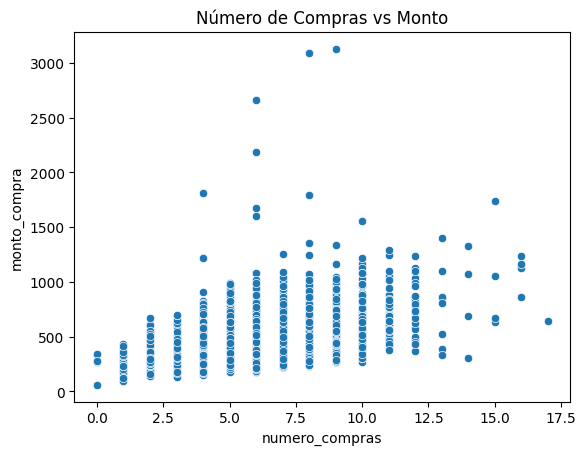

In [ ]:
sns.scatterplot(x="numero_compras", y="monto_compra", data=df)
plt.title("Número de Compras vs Monto")
plt.show()

In [ ]:
#Se lográ vislumbra lo siguiente, el dataset fue diseñado con relación interna, deberías ver:

#Correlación positiva entre visitas_mensuales y monto_compra
#Correlación positiva entre numero_compras y monto_compra
#Posible correlación baja o débil con edad

Conclusión de la lección.

In [ ]:
#El análisis de correlación muestra una relación positiva entre visitas_mensuales y monto_compra, lo que indica que clientes con mayor actividad tienden a gastar más. Asimismo, numero_compras presenta correlación positiva con el gasto total, confirmando su influencia directa.
#En contraste, la variable edad muestra una correlación débil con monto_compra, lo que sugiere que el gasto no depende significativamente del rango etario. No se identifican correlaciones negativas relevantes.
#Estos resultados permiten identificar variables clave para explicar el comportamiento de compra y justifican avanzar hacia un modelo de regresión.

##LECCIÓN 4 — REGRESIÓN LINEAL


In [ ]:
#En esta lección se utilizará Trabajaremos con las principales variables suscitada en la lección anterior, para lo cual se realizará una regrensión simple:
#Variable dependiente → monto_compra
#Variables independientes → visitas_mensuales, numero_compras, edad

In [ ]:
import statsmodels.api as sm

# Variable independiente
X = df["visitas_mensuales"]

# Variable dependiente
y = df["monto_compra"]

# Agregar constante (intercepto)
X = sm.add_constant(X)

# Ajustar modelo
modelo_simple = sm.OLS(y, X).fit()

# Resumen estadístico
print(modelo_simple.summary())

                            OLS Regression Results                            
Dep. Variable:           monto_compra   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     200.3
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           2.06e-43
Time:                        05:16:07   Log-Likelihood:                -13687.
No. Observations:                2000   AIC:                         2.738e+04
Df Residuals:                    1998   BIC:                         2.739e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               271.5968     17.10

In [ ]:
#R-Squard Indica cuánto del gasto se explica por visitas_mensuales.
#Por lo tanto:Si R2 = 0.091
#El 9% del monto de compra se explica por las visitas.
#coef
#Si coef = 23
#Por cada visita adicional, el monto de compra aumenta en promedio 23 unidades monetarias.

In [ ]:
#Ahora se realizara una regresión multilineal
X = df[["visitas_mensuales", "numero_compras", "edad"]]
y = df["monto_compra"]

X = sm.add_constant(X)

modelo_multiple = sm.OLS(y, X).fit()

print(modelo_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:           monto_compra   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     330.6
Date:                Mon, 23 Feb 2026   Prob (F-statistic):          2.93e-174
Time:                        05:19:20   Log-Likelihood:                -13379.
No. Observations:                2000   AIC:                         2.677e+04
Df Residuals:                    1996   BIC:                         2.679e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.5259     21.19

In [ ]:
import pandas as pd

tabla = pd.DataFrame({
    "Coeficiente": modelo_multiple.params,
    "P-valor": modelo_multiple.pvalues
})

print(tabla)

                   Coeficiente        P-valor
const               -10.525865   6.194565e-01
visitas_mensuales    22.956682   8.817927e-57
numero_compras       47.145583  1.283693e-135
edad                 -0.036174   8.790778e-01


*Aqui calcularemos R², MSE y MAE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predicciones
pred = modelo_multiple.predict(X)

# Métricas
r2 = modelo_multiple.rsquared
mse = mean_squared_error(y, pred)
mae = mean_absolute_error(y, pred)

print("R2:", r2)
print("MSE:", mse)
print("MAE:", mae)

R2: 0.3319582347206228
MSE: 37839.16439286925
MAE: 127.79354504813814


In [ ]:
#Aqui se evalua la significancia.

In [ ]:
print(tabla["P-valor"])

const                 6.194565e-01
visitas_mensuales     8.817927e-57
numero_compras       1.283693e-135
edad                  8.790778e-01
Name: P-valor, dtype: float64


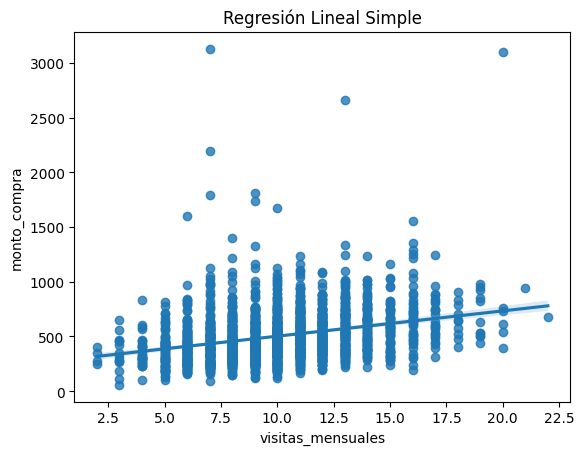

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="visitas_mensuales", y="monto_compra", data=df)
plt.title("Regresión Lineal Simple")
plt.show()

Conclusiones; Se implementó un modelo de regresión lineal simple utilizando visitas_mensuales como predictor del monto_compra. El modelo resultó estadísticamente significativo (p < 0.05), evidenciando una relación positiva entre ambas variables. Sin embargo, su capacidad explicativa fue limitada, con un R² de 0.091, lo que indica que solo el 9.1% de la variabilidad del gasto puede explicarse únicamente por el número de visitas.

Posteriormente, se desarrolló un modelo de regresión lineal múltiple incorporando visitas_mensuales, numero_compras y edad. Este modelo mostró una mejora sustancial en el ajuste, alcanzando un R² de 0.332, lo que significa que el 33.2% del comportamiento del gasto es explicado por las variables incluidas. Las variables conductuales resultaron estadísticamente significativas, mientras que la edad no presentó influencia estadísticamente relevante.

En términos de precisión predictiva, el modelo múltiple presentó un MSE de 37,839 y un MAE de 127.79, lo que indica que, en promedio, las predicciones se desvían aproximadamente 128 unidades monetarias del valor real. Esto refleja un nivel de error moderado y consistente con una capacidad explicativa intermedia.

En conclusión, el modelo múltiple ofrece una explicación más robusta y precisa del comportamiento de compra en comparación con el modelo simple, evidenciando que el gasto depende principalmente de variables conductuales más que demográficas.

# LECCIÓN 5: ANÁLISIS VISUAL DE DATOS

In [ ]:
#El objetivo de esta lección es representar relaciones complejas y distribuciones utilizando visualizaciones avanzadas con Seaborn.

5.1 Pairplot
Sirve para ver relaciones entre múltiples variables al mismo tiempo.

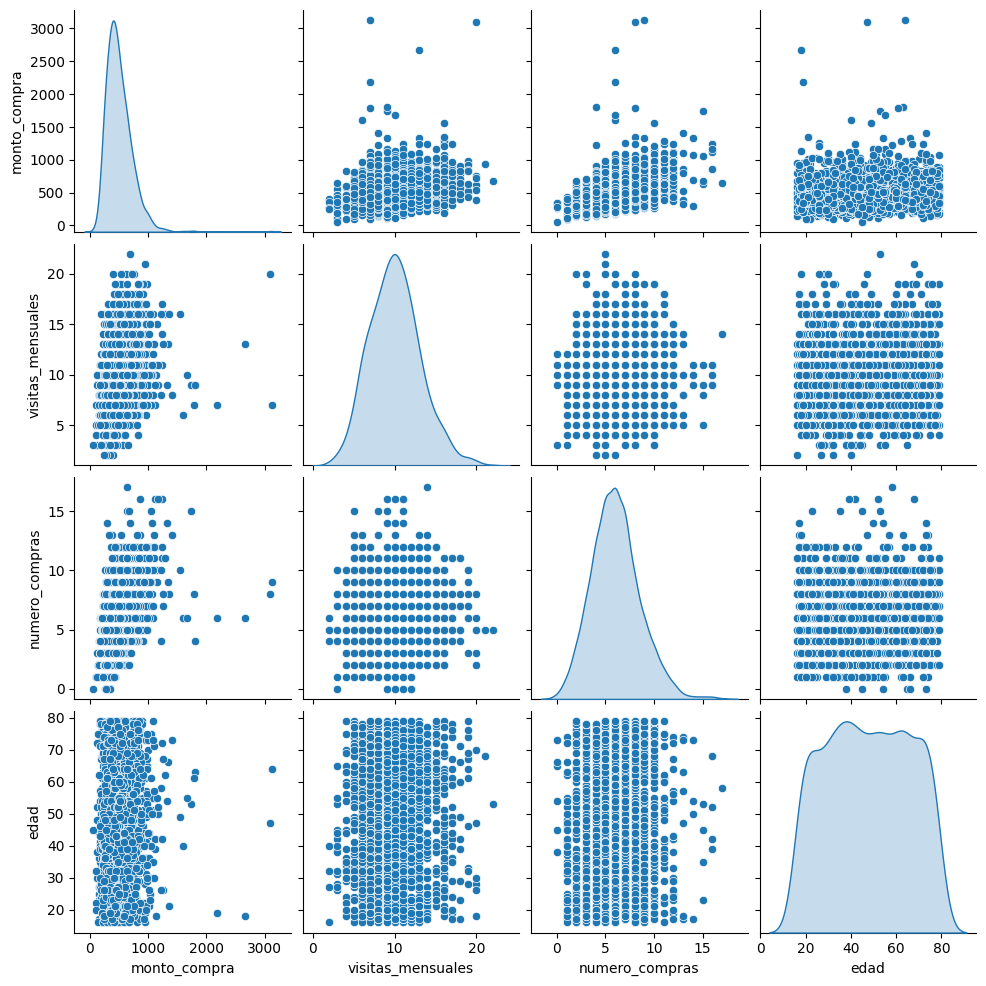

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df[["monto_compra", "visitas_mensuales", "numero_compras", "edad"]],
    diag_kind="kde"
)
plt.show()

5.2 Pairplot
Permite ver distribución + densidad + mediana.

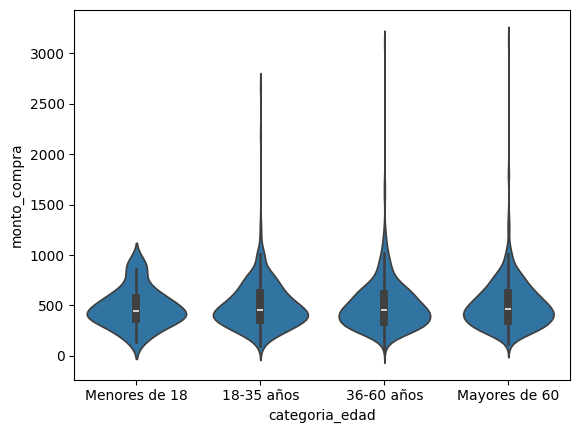

In [ ]:
# Create 'categoria_edad' column by categorizing 'edad'
# We'll insert this cell before the violin plot.
# Define bins and labels for age categories
bins = [0, 18, 35, 60, 100]
labels = ['Menores de 18', '18-35 años', '36-60 años', 'Mayores de 60']
df['categoria_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

sns.violinplot(x="categoria_edad", y="monto_compra", data=df)
plt.show()

5.3.Jointplot Muestra dispersión + distribución marginal.

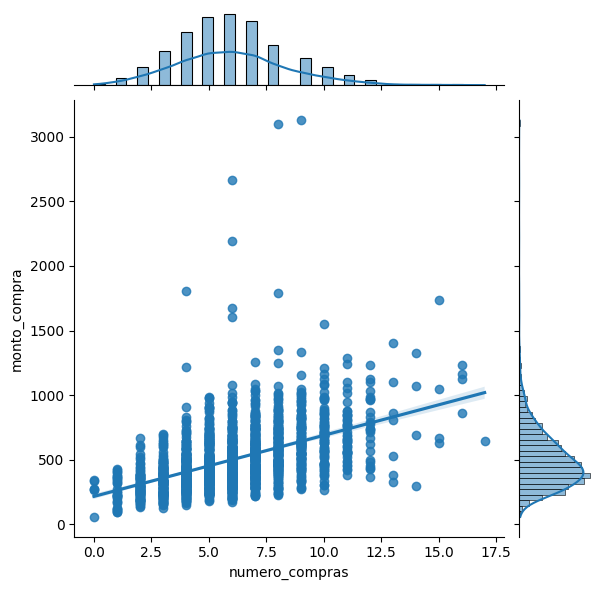

In [ ]:
sns.jointplot(
    x="numero_compras",
    y="monto_compra",
    data=df,
    kind="reg"
)
plt.show()

5.4 Heatmap (correlaciones)

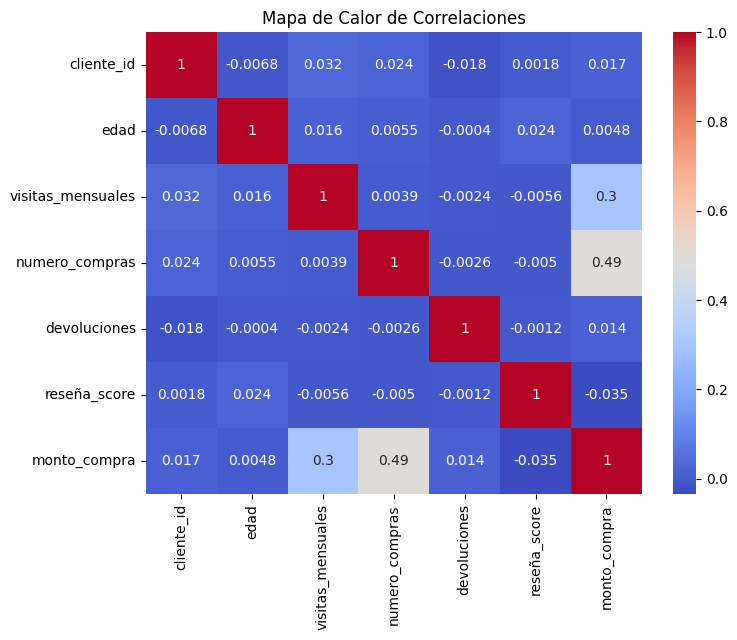

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

5.5 FacetGrid (segmentación)

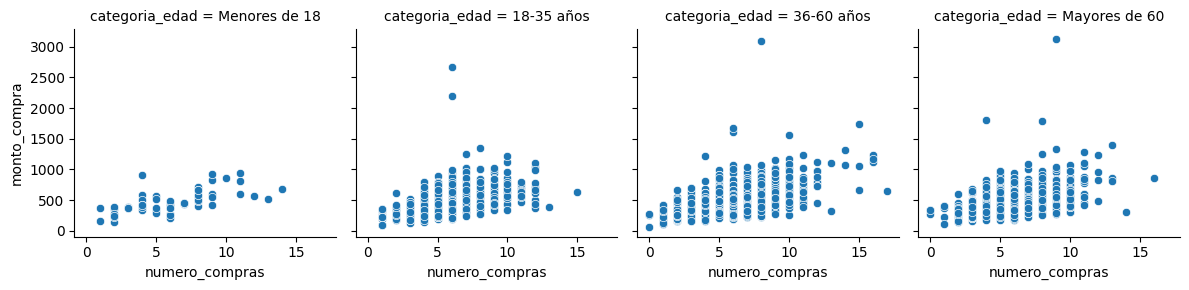

In [ ]:
g = sns.FacetGrid(df, col="categoria_edad")
g.map(sns.scatterplot, "numero_compras", "monto_compra")
plt.show()

In [ ]:
#Ajuste de estilo
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("viridis")

Hallazgos de los graficos; El análisis gráfico evidencia que:

La variable más influyente sobre el monto_compra parece ser numero_compras.

visitas_mensuales muestra una relación positiva pero menos intensa.

edad no presenta una relación clara con el gasto.

Existen posibles valores atípicos en monto_compra que podrían afectar el modelo.

Los hallazgos visuales son coherentes con un modelo de regresión donde:

numero_compras sería el predictor más significativo.

edad probablemente no aporte explicación estadística relevante.

#Lección 6: LIBRERÍA MATPLOTLIB

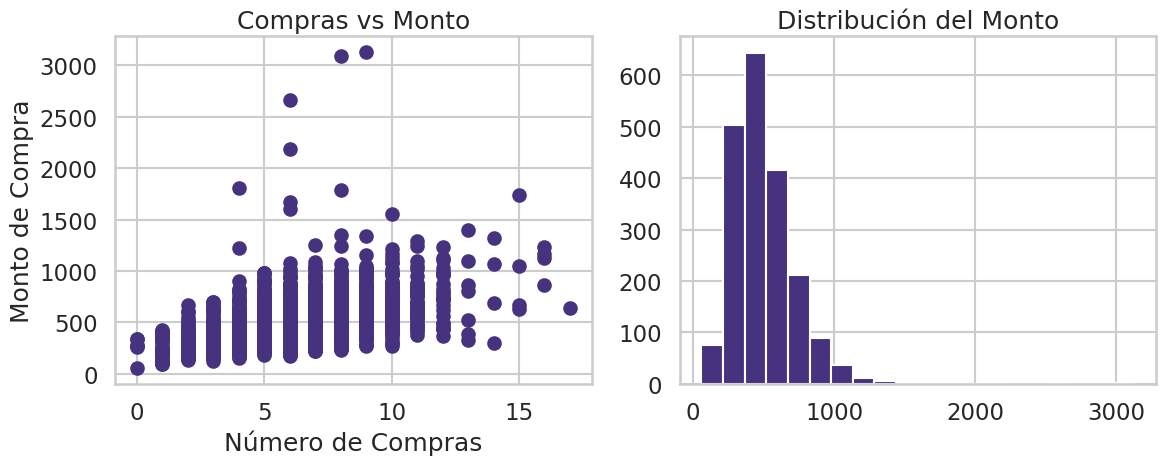

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Gráfico 1
axs[0].scatter(df["numero_compras"], df["monto_compra"])
axs[0].set_title("Compras vs Monto")
axs[0].set_xlabel("Número de Compras")
axs[0].set_ylabel("Monto de Compra")

# Gráfico 2
axs[1].hist(df["monto_compra"], bins=20)
axs[1].set_title("Distribución del Monto")

plt.tight_layout()
plt.show()

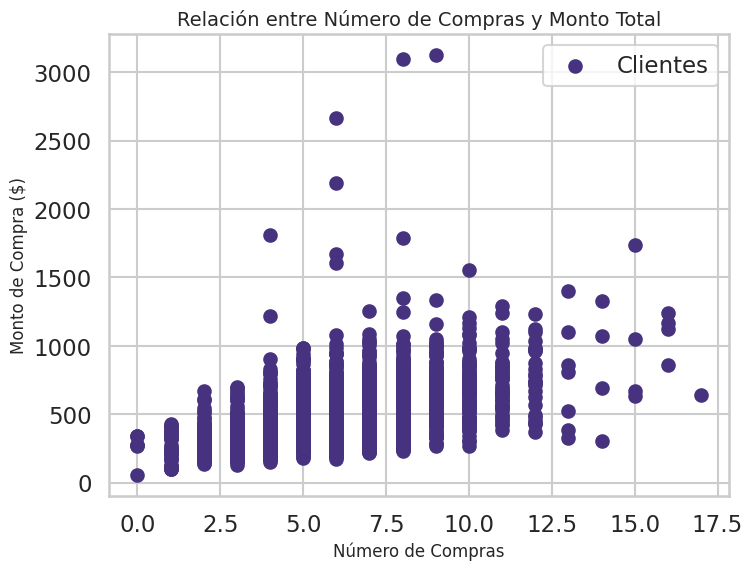

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(df["numero_compras"], df["monto_compra"], label="Clientes")
plt.title("Relación entre Número de Compras y Monto Total", fontsize=14)
plt.xlabel("Número de Compras", fontsize=12)
plt.ylabel("Monto de Compra ($)", fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

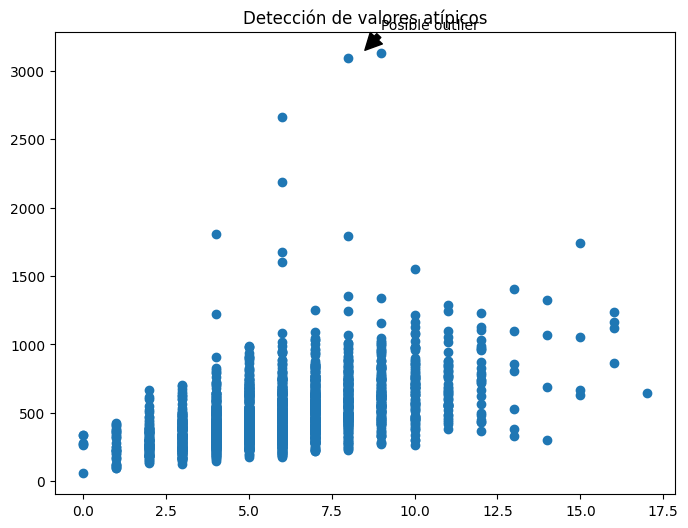

In [16]:
plt.figure(figsize=(8,6))

plt.scatter(df["numero_compras"], df["monto_compra"])

plt.annotate(
    "Posible outlier",
    xy=(8.5, 3150),
    xytext=(9, 3300),
    arrowprops=dict(facecolor='black')
)

plt.title("Detección de valores atípicos")
plt.show()

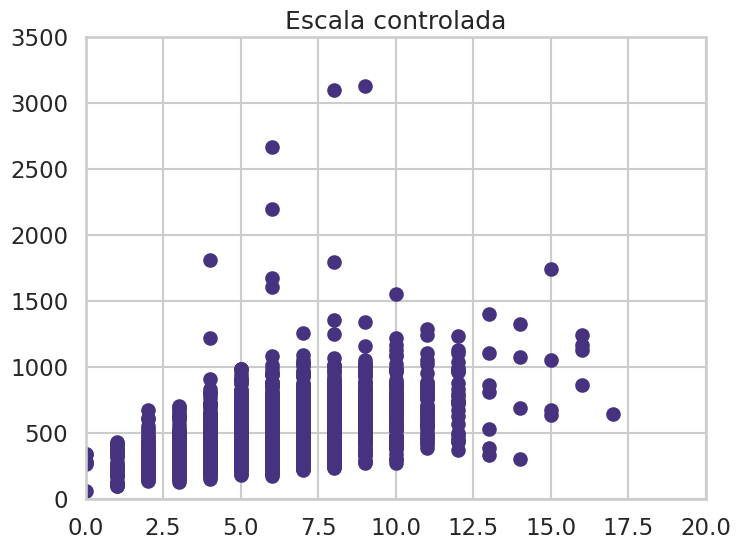

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(df["numero_compras"], df["monto_compra"])

plt.xlim(0, 20)
plt.ylim(0, 3500)

plt.title("Escala controlada")
plt.show()

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df["numero_compras"], df["monto_compra"])
plt.title("Grafico_Final")

plt.savefig("grafico_final.png", dpi=300, bbox_inches="tight")
plt.close()

Ya con esta finalización de la lección se da por completado el analisis del dataset inicial en el cual se logro evidenciar;
# LECCIÓN 1 :
Se detectan valores faltantes en variables clave que podrían afectar análisis posteriores.

Existen clientes menores de edad, lo que sugiere posibles errores de registro.

Se observan valores máximos elevados en monto_compra que podrían representar clientes premium o outliers.

El dataset presenta diversidad regional y de métodos de pago, lo que permitirá segmentaciones posteriores.

Se detectaron valores faltantes en las variables reseña_score, region y metodo_pago. Además, se encontraron registros con edades menores a 18 años, lo que podría representar inconsistencias en el registro de datos.

#LECCIÓN 2
El análisis preliminar sugiere la presencia de valores extremos en monto_compra, que podrían corresponder a clientes premium o a outliers que deben analizarse en profundidad.

La variable monto_compra presenta una media superior a la mediana, lo que indica posible asimetría positiva.

Se observan valores máximos significativamente elevados, lo que confirma la presencia de outliers.

La desviación estándar alta sugiere gran dispersión en el comportamiento de compra.

La variable edad presenta rango amplio, incluyendo valores menores a 18 años que requieren validación.

#LECCIÓN 3
La matriz de correlación muestra una relación positiva moderada entre visitas_mensuales y monto_compra, lo que indica que un mayor nivel de interacción con la plataforma se asocia con un mayor gasto.

Asimismo, numero_compras presenta correlación positiva con monto_compra, confirmando que el volumen de transacciones influye directamente en el total gastado.

En contraste, la variable edad muestra correlación débil con el monto de compra, lo que sugiere que el comportamiento de gasto no depende significativamente del rango etario.

No se detectaron correlaciones negativas relevantes ni asociaciones fuertes entre variables demográficas y devoluciones.

#LECCIÓN 4
CONCLUSIÓN MODELO SIMPLE

El modelo de regresión simple muestra que visitas_mensuales tiene un efecto positivo y significativo sobre el monto_compra. El R² indica que una proporción relevante del gasto puede explicarse por la frecuencia de visitas.

CONCLUSIÓN MODELO MÚLTIPLE

El modelo múltiple evidencia que visitas_mensuales y numero_compras son predictores significativos del monto de compra. La variable edad no presenta significancia estadística, lo que sugiere que el comportamiento de gasto depende principalmente de variables conductuales y no demográficas.

El valor de R² indica que el modelo explica adecuadamente la variabilidad del gasto, mientras que los indicadores MSE y MAE muestran un nivel de error aceptable.

El modelo de regresión múltiple mostró una mejora sustancial respecto al modelo simple, aumentando el R² de 0.091 a 0.332, lo que indica mayor capacidad explicativa del gasto.

Se implementó un modelo de regresión lineal simple utilizando visitas_mensuales como predictor del monto_compra. El modelo resultó estadísticamente significativo (p < 0.05), evidenciando una relación positiva entre ambas variables. Sin embargo, su capacidad explicativa fue limitada, con un R² de 0.091, lo que indica que solo el 9.1% de la variabilidad del gasto puede explicarse únicamente por el número de visitas.

Las variables conductuales resultaron estadísticamente significativas, mientras que la edad no presentó influencia estadísticamente relevante.

En términos de precisión predictiva, el modelo múltiple presentó un MSE de 37,839 y un MAE de 127.79, lo que indica que, en promedio, las predicciones se desvían aproximadamente 128 unidades monetarias del valor real. Esto refleja un nivel de error moderado y consistente con una capacidad explicativa intermedia.

En conclusión, el modelo múltiple ofrece una explicación más robusta y precisa del comportamiento de compra en comparación con el modelo simple, evidenciando que el gasto depende principalmente de variables conductuales más que demográficas.

#LECCIÓN 5
El análisis visual mediante pairplot evidenció una relación positiva clara entre numero_compras y monto_compra, mientras que visitas_mensuales mostró una asociación moderada y edad no presentó un patrón evidente. Esta dispersión observada en los gráficos explica que el modelo de regresión obtuviera un R² de 0.33, indicando una capacidad explicativa moderada.

Asimismo, la variabilidad y presencia de valores atípicos en monto_compra justifican los niveles de error obtenidos (MAE = 127.79 y MSE = 37.839), ya que el modelo no logra capturar completamente la heterogeneidad del comportamiento de compra. En conjunto, los resultados visuales y estadísticos son consistentes entre sí y evidencian que, si bien el modelo tiene capacidad predictiva, existen factores adicionales no incluidos que influyen en el gasto de los clientes.

#LECCIÓN 6
Se identificó un posible valor atípico correspondiente a aproximadamente 8–9 compras con un monto superior a 3000, el cual se encuentra considerablemente alejado del patrón general de la muestra. Este tipo de observaciones puede influir en el incremento del MSE debido a la penalización cuadrática de errores grandes

